In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [7]:
df.shape

(10000, 15)

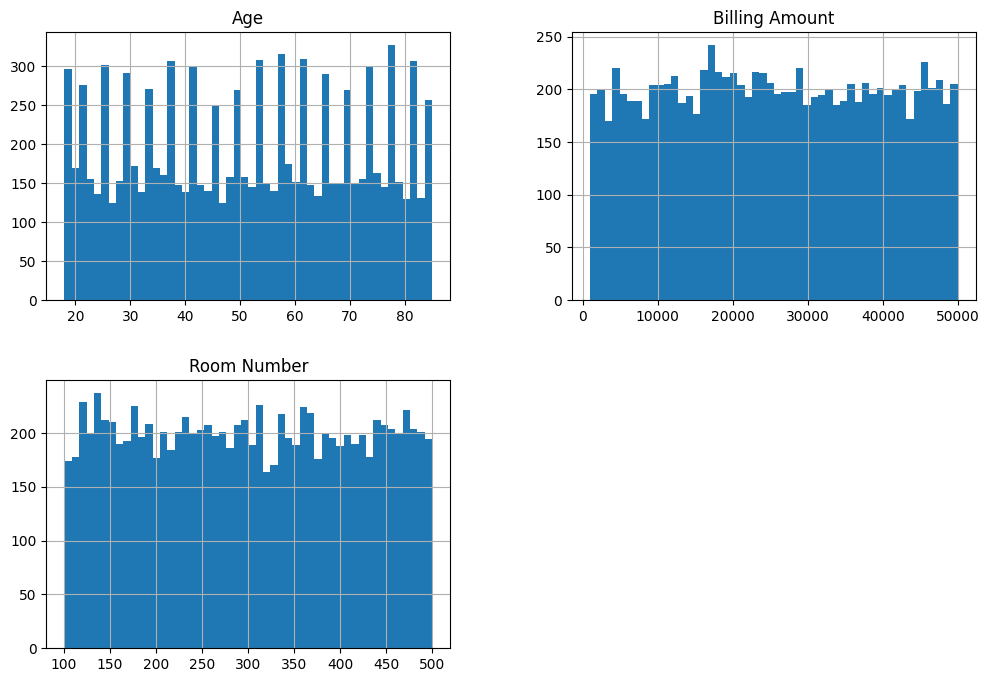

In [8]:
df.hist(bins=50, figsize=(12,8))
plt.show()

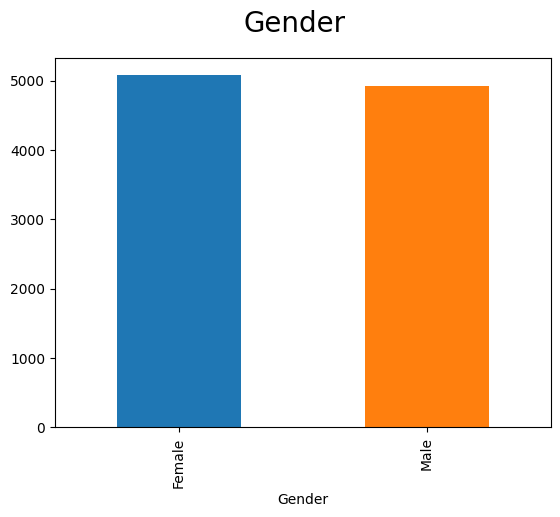

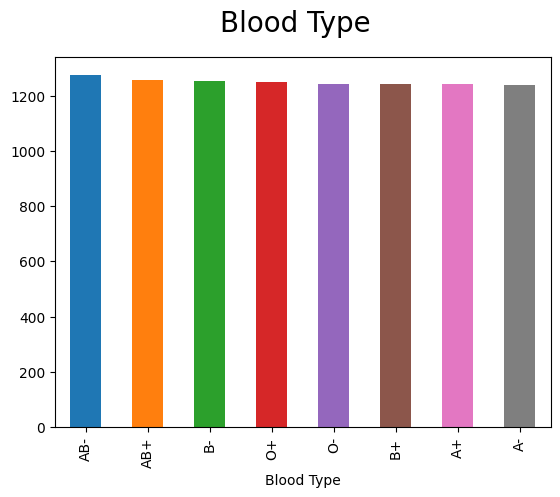

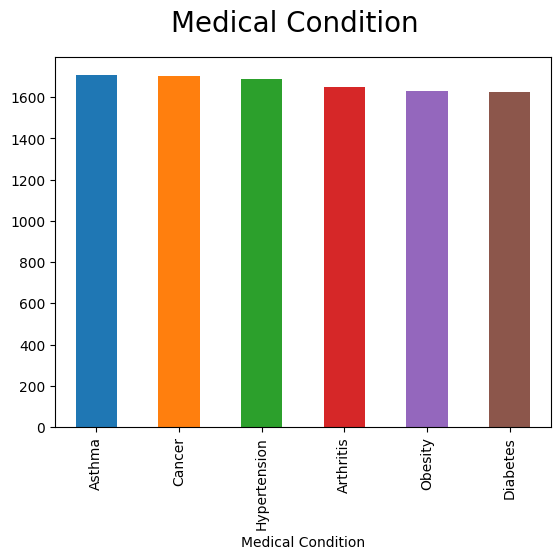

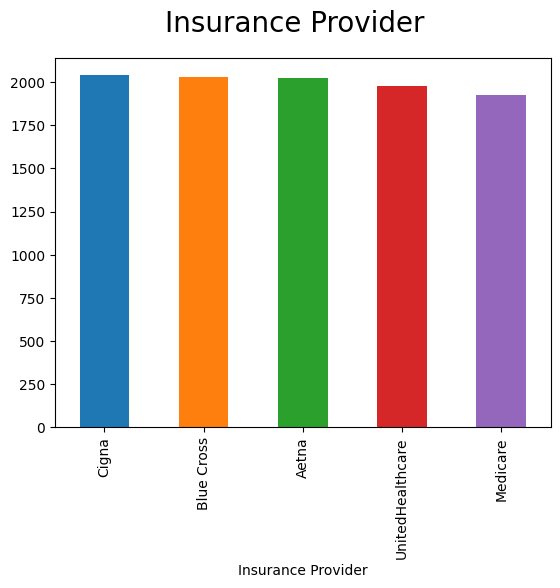

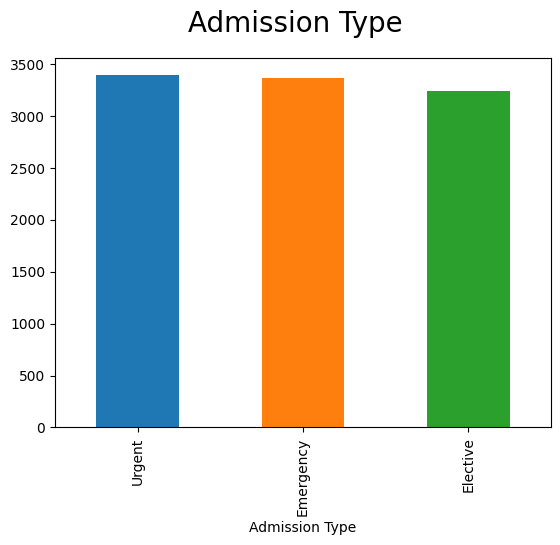

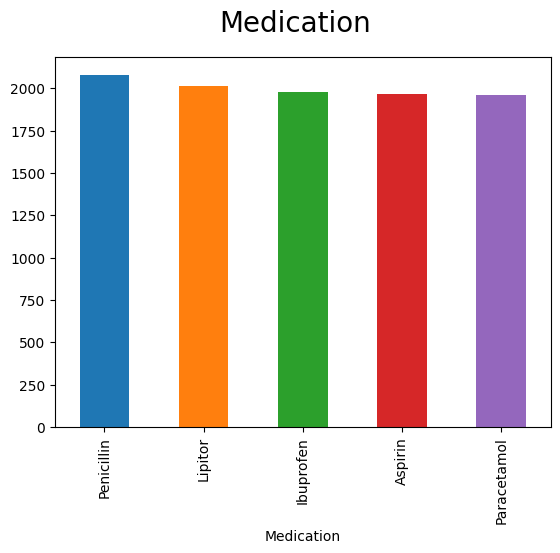

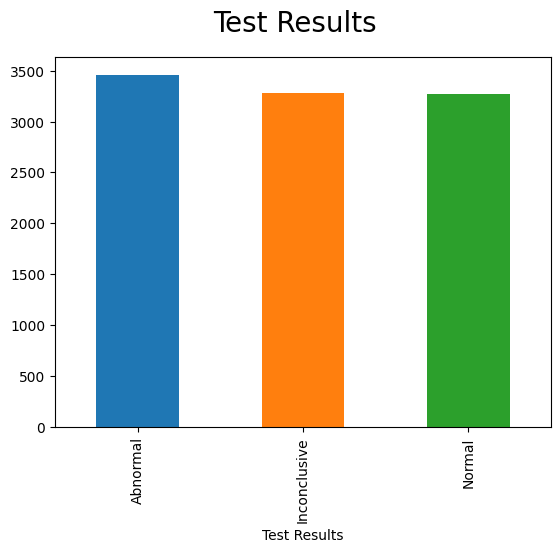

In [12]:
cols = ['Gender','Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type','Medication', 'Test Results']

for i in cols:
  fig, ax = plt.subplots(1, 1)
  fig.suptitle(i , fontsize=20)
  #plt.style.use('seaborn')
  plt.subplot(1,1,1)
  df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10"))
  plt.show()

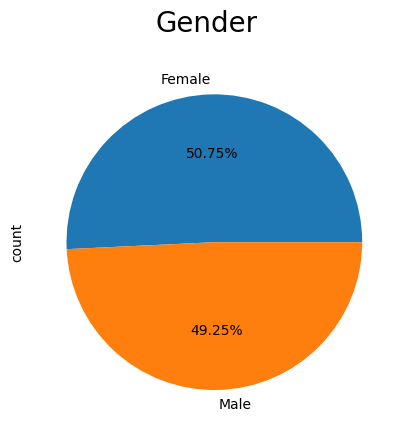

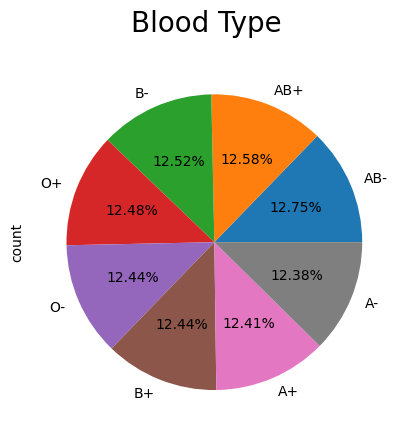

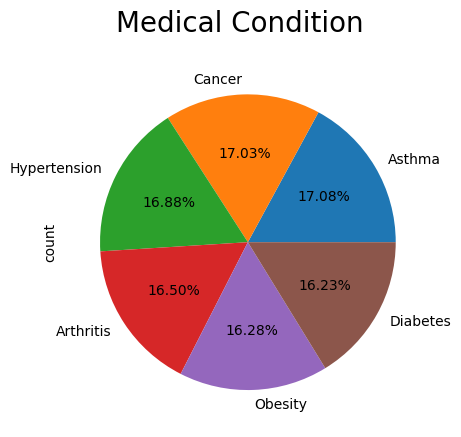

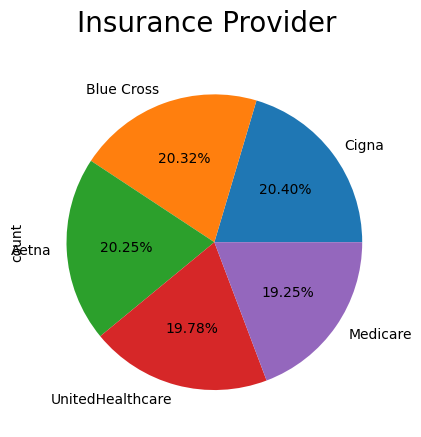

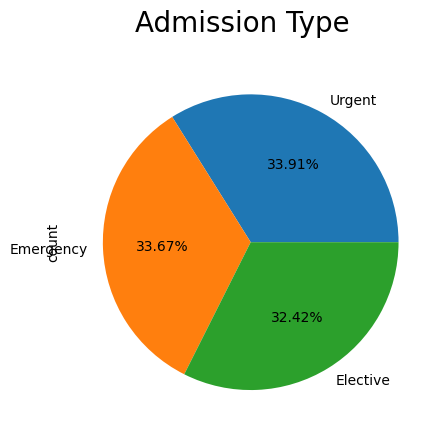

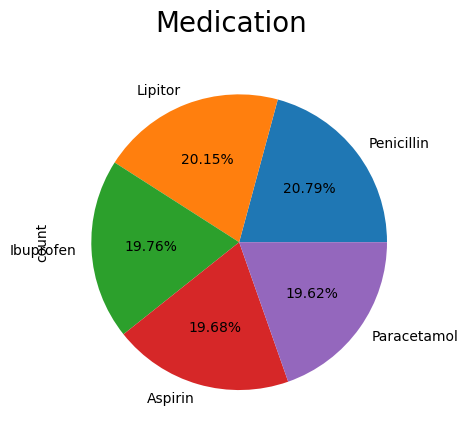

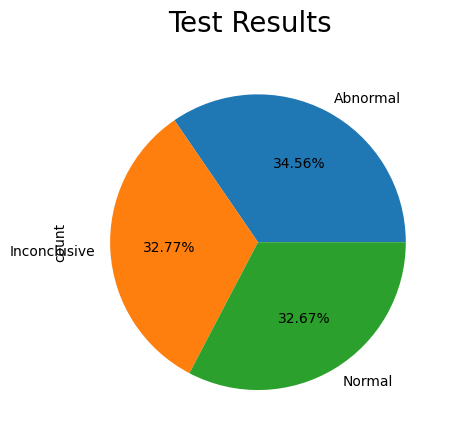

In [14]:
for i in cols:
  fig, ax = plt.subplots(1, 1)
  fig.suptitle(i , fontsize=20)
  #plt.style.use('seaborn')
  plt.subplot(1,1,1)
  df[i].value_counts().plot(kind='pie',autopct="%.2f%%")
  plt.show()

In [15]:
df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days hospitalized'] = df['Days hospitalized'].astype(int) / 86400000000000 # Converting to number of days

df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14.0
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14.0
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30.0
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1.0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24.0


In [16]:
df2 = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results','Days hospitalized']]

In [17]:
for col in df2.columns:
    print(col, df2[col].nunique())

Age 68
Gender 2
Blood Type 8
Medical Condition 6
Admission Type 3
Medication 5
Test Results 3
Days hospitalized 30


In [18]:
df2.head()

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Days hospitalized
0,81,Female,O-,Diabetes,Elective,Aspirin,Inconclusive,14.0
1,35,Male,O+,Asthma,Emergency,Lipitor,Normal,14.0
2,61,Male,B-,Obesity,Emergency,Lipitor,Normal,30.0
3,49,Male,B-,Asthma,Urgent,Penicillin,Abnormal,1.0
4,51,Male,O-,Arthritis,Urgent,Paracetamol,Normal,24.0


In [19]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']
for i in cols:
  df2[i]=lc.fit_transform(df2[i])
df2.head()

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Days hospitalized
0,81,0,7,3,0,0,1,14.0
1,35,1,6,1,1,2,2,14.0
2,61,1,5,5,1,2,2,30.0
3,49,1,5,1,2,4,0,1.0
4,51,1,7,0,2,3,2,24.0


In [20]:
X=df2.drop(['Test Results'],axis=1)
y=df2['Test Results']

In [21]:
X.head()


,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Days hospitalized
0,81,0,7,3,0,0,14.0
1,35,1,6,1,1,2,14.0
2,61,1,5,5,1,2,30.0
3,49,1,5,1,2,4,1.0
4,51,1,7,0,2,3,24.0


In [22]:
y.head()

,Test Results
0,1
1,2
2,2
3,0
4,2


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [25]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [26]:
model.score(X_test,y_test)

0.327

In [27]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.327

<Figure size 10000x10000 with 0 Axes>

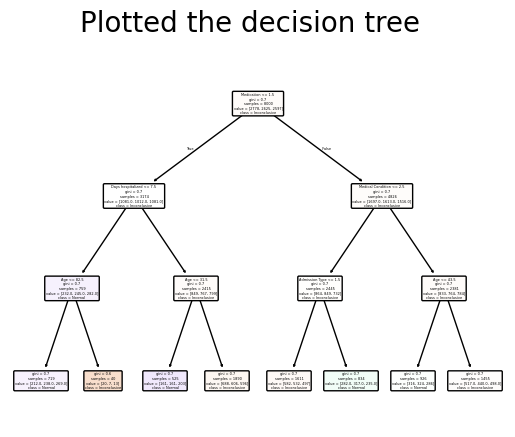

In [29]:
plt.figure(figsize=(100, 100))
fig, ax = plt.subplots(1, 1)
fig.suptitle('Plotted the decision tree' , fontsize=20)
#plt.style.use('seaborn')
dec_tree = plot_tree(decision_tree = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train), feature_names = X.columns,
                   class_names = df['Test Results'],
                   rounded = True,filled = True,precision = True)